In [9]:
###we are going to predict the price of the car based on the features given in this particular dataset

In [8]:
conda install pandas

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/Car

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-1.2.1               |   py37hb2f4e1b_0         8.1 MB
    ------------------------------------------------------------
                                           Total:         8.1 MB

The following NEW packages will be INSTALLED:

  blas               pkgs/main/osx-64::blas-1.0-mkl
  intel-openmp       pkgs/main/osx-64::intel-openmp-2019.4-233
  mkl                pkgs/main/osx-64::mkl-2019.4-233
  mkl-service        pkgs/main/osx-64::mkl-service-2.3.0-py37h9ed2024_0
  mkl_fft            pkgs/main/osx-64::mkl_fft-1.2.0-py37hc64f4ea_0
  mkl_random         pkgs/main/osx-64::mkl_random-1.1.1-py37h959d312_0
  numpy              pkgs/main/osx-64::numpy-1.19.2-py37h456fd55_0
  numpy-base         pkgs/main

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape #gives 9 features(columns) and 301 records(rows)

(301, 9)

In [5]:
print(df['Seller_Type'].unique())

['Dealer' 'Individual']


In [6]:
print(df['Seller_Type'].unique()) #to check how many unique values are there in the categorical feature
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [7]:
##check missing or null values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
final_dataset=df[["Year","Selling_Price","Present_Price","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner"]]

In [11]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
#create new feature - current_year

final_dataset["Current_Year"]=2021

In [13]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [14]:
final_dataset["No_Years"]=final_dataset["Current_Year"]-final_dataset["Year"]

In [15]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [16]:
final_dataset.drop(["Year"], axis=1, inplace=True) #deletingthe coloumns that are not required

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [18]:
final_dataset.drop(["Current_Year"], axis=1, inplace=True) #deleeteing the columns that are not required

In [19]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [20]:
#converting the categorical features into some other values
#get_dummies helps in converting all these features into one-hot-encoded values

#drop_first=True , so that the first col is deleted to prevent it from dummy variable trap
#here CNG has been dropped to prevent it from dummy variable trap
final_dataset= pd.get_dummies(final_dataset,drop_first=True)

In [21]:
final_dataset.head()

# this is the new dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [22]:
final_dataset.corr()

#.corr()- correlation . It says how one features are correlated to the other feature

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


done


In [24]:
import seaborn as sns

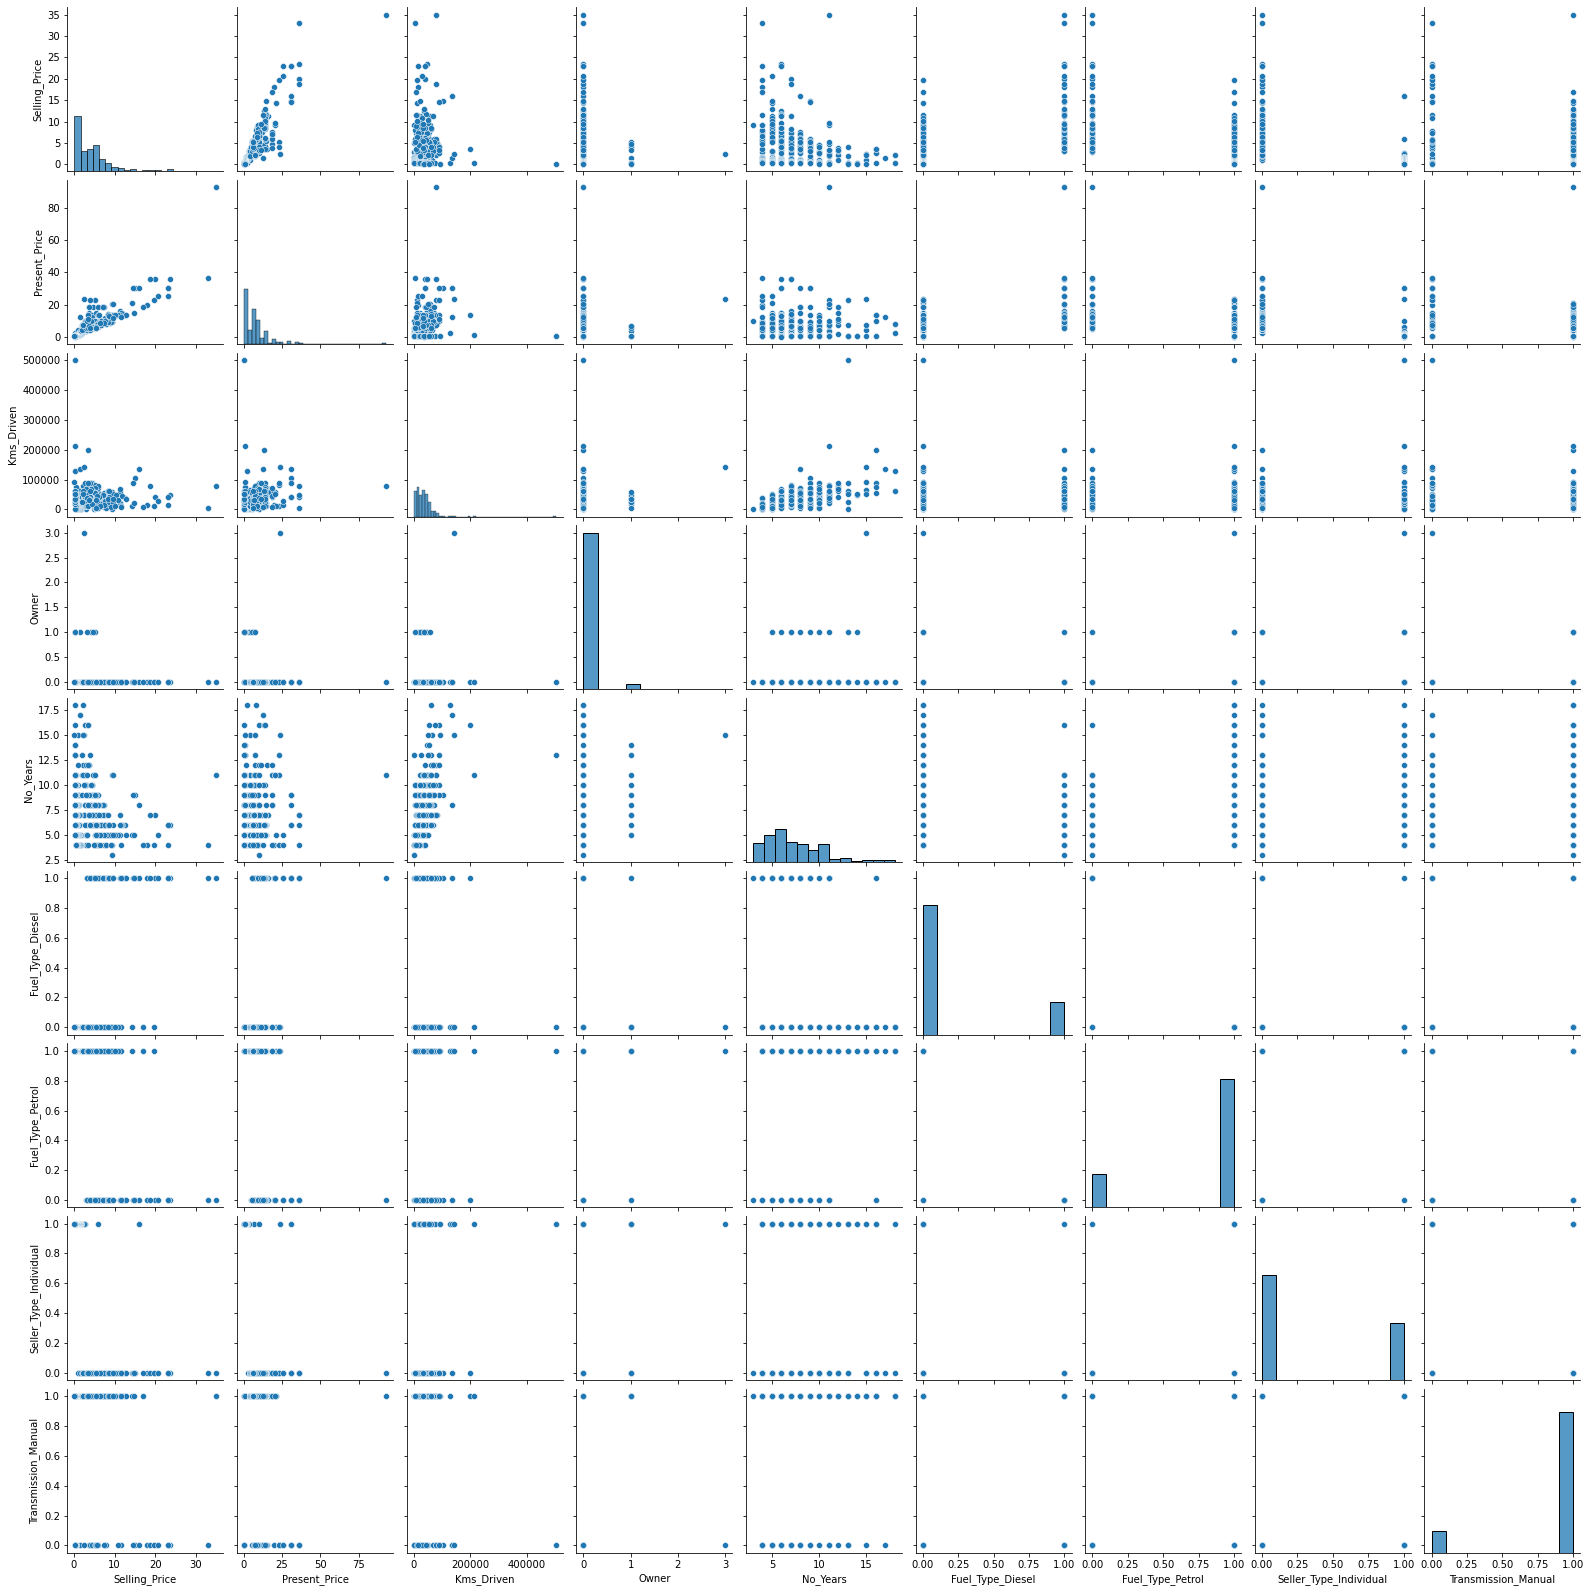

In [25]:
sns.pairplot(final_dataset)

In [26]:
# plotting in the form of heatmap
import matplotlib.pyplot as plt
%matplotlib inline



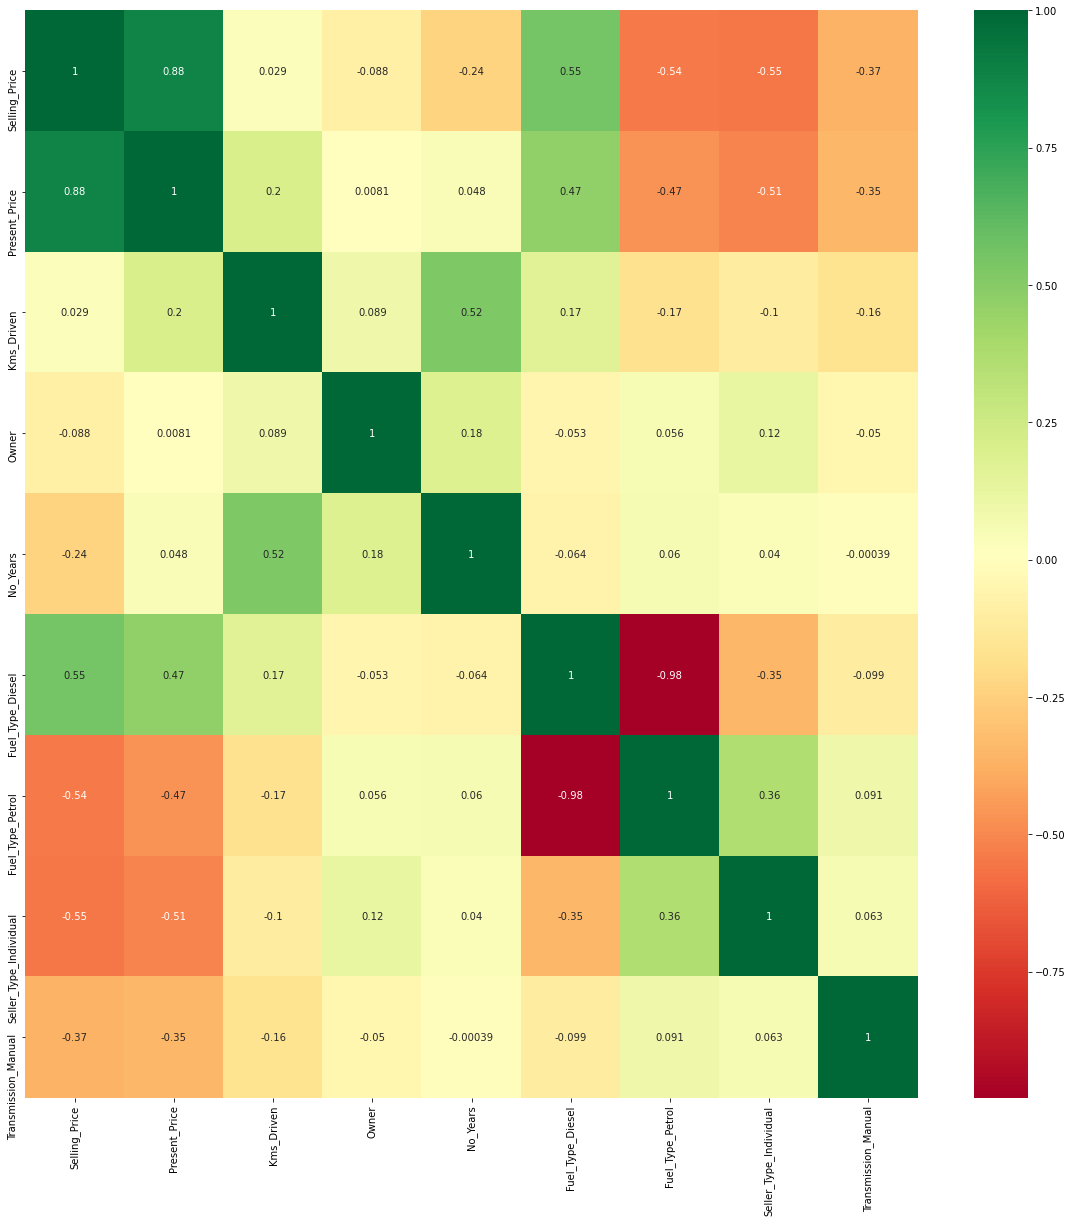

In [27]:
#which features are highly correlated and which are inversely correlated
corrmat=final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [28]:
final_dataset.head()

#selling price is dependent feature and the rest are independent features

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [29]:
##dependent and independent features
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [30]:
X.head()

,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [31]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [35]:
conda install scikit-learn

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/Car

  added / updated specs:
    - scikit-learn


The following NEW packages will be INSTALLED:

  joblib             pkgs/main/noarch::joblib-1.0.0-pyhd3eb1b0_0
  llvm-openmp        pkgs/main/osx-64::llvm-openmp-10.0.0-h28b9765_0
  scikit-learn       pkgs/main/osx-64::scikit-learn-0.23.2-py37h959d312_0
  threadpoolctl      pkgs/main/noarch::threadpoolctl-2.1.0-pyh5ca1d4c_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [33]:
#feature importance

from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [34]:
print(model.feature_importances_)

[0.35125437 0.0424474  0.00053824 0.07032724 0.2412212  0.01200616
 0.1307852  0.15142021]


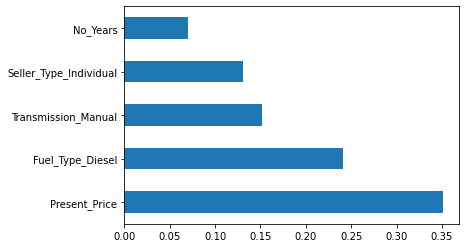

In [36]:
#plot graph offeature importances for better visualisation

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [37]:
#here in this case we will take all the features

#doing the train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [38]:
X_train.shape

(240, 8)

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [43]:
#hyperparameters 
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12) ]#for selecting different number of decision trees.
print(n_estimators)

#number of features to consider at every split
max_features= ['auto','sqrt']
print(max_features)

#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6) ]
#max_depth.append(None)
print(max_depth)

#Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
print(min_samples_split)

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]
print(min_samples_leaf)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
['auto', 'sqrt']
[5, 10, 15, 20, 25, 30]
[2, 5, 10, 15, 100]
[1, 2, 5, 10]


In [44]:
from sklearn.model_selection import RandomizedSearchCV 
#RandomizedSearchCV  is faster than GridSearchCV

In [45]:
#creating the random grid

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}

print(random_grid)

#RandomizedSearchCV will take the best parameters out of these below parameters


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [46]:
#first create the base model to tune
rf = RandomForestRegressor()

In [47]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [48]:
rf_random.fit(X_train,y_train)
#n_jobs=1 : all the cores of the laptop will be used
#verbose : used to give details, when the training is actually happening

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
predictions = rf_random.predict(X_test) # doing predictions for x test data

In [51]:
predictions

array([ 0.82625,  4.27269,  0.38664,  9.02304,  5.91504,  0.54566,
        3.09043,  5.44546, 10.93345,  0.48044,  5.19248,  5.35436,
        0.79921,  3.14792,  0.67346,  8.15598,  0.41816,  7.48852,
        0.39507,  0.5358 ,  5.4698 ,  2.50716,  5.5409 ,  0.32291,
        5.26835,  8.97246,  4.85022, 10.7384 ,  4.56251,  3.40251,
        7.74807,  1.53827,  1.0408 ,  0.32088,  5.21887,  3.6007 ,
        8.78896,  1.3707 ,  5.68956,  9.78958,  1.14098,  8.51366,
        4.66341,  6.18791,  4.1727 ,  5.46268,  3.36014,  5.46396,
        1.0924 , 20.70019,  0.65415,  7.46786,  4.21292,  3.86752,
        6.93308,  0.57273,  0.50868,  3.71039,  2.19175,  5.66286,
        0.24442])

/opt/anaconda3/envs/Car/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

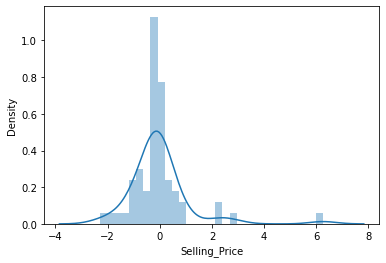

In [56]:
# to compare
sns.distplot(y_test-predictions)

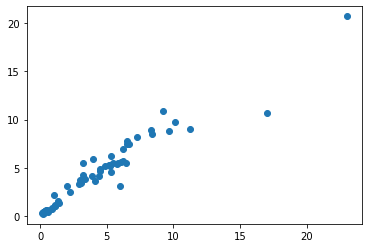

In [55]:
plt.scatter(y_test,predictions)
#plotting is linearly available which means that our prediction is good
#y_test is our real values . the difference between y test and predictions should be minimal

In [57]:
import pickle

#open a file where you wantto store the data

file = open('random_forest_regression_model.pkl','wb')
#random_forest_regression_model.pkl is pickle file name and then we dump the file in the particular location
#pickle file is a serialised file
#dump information to that file
pickle.dump(rf_random, file)

In [ ]:
#creating requirement.txt

pip freeze > requirements.txt #in bash

#will create frontend using spyder
